In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataframe first
df = pd.read_csv('/content/USA_Housing.csv')

# Now you can apply str.replace and astype
pd.options.display.float_format = '{:,.2f}'.format
# Convert column to string first, then remove commas, then convert to float
df['Avg. Area Income'] = df['Avg. Area Income'].astype(str).str.replace(',', '').astype(float)
df['Price'] = df['Price'].astype(str).str.replace(',', '').astype(float)

df['Area Population'] = df['Area Population'].astype(str).str.replace(',', '').astype(float)

In [196]:
df=pd.read_csv('/content/USA_Housing.csv')

In [197]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,"79,545.46",5.68,7.01,4.09,"23,086.80","1,059,033.56","208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,"79,248.64",6.00,6.73,3.09,"40,173.07","1,505,890.91","188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,"61,287.07",5.87,8.51,5.13,"36,882.16","1,058,987.99","9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,"63,345.24",7.19,5.59,3.26,"34,310.24","1,260,616.81",USS Barnett\nFPO AP 44820
4,"59,982.20",5.04,7.84,4.23,"26,354.11","630,943.49",USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,"60,567.94",7.83,6.14,3.46,"22,837.36","1,060,193.79",USNS Williams\nFPO AP 30153-7653
4996,"78,491.28",7.00,6.58,4.02,"25,616.12","1,482,617.73","PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,"63,390.69",7.25,4.81,2.13,"33,266.15","1,030,729.58","4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,"68,001.33",5.53,7.13,5.44,"42,625.62","1,198,656.87",USS Wallace\nFPO AE 73316


In [198]:
df['Address']

,Address
0,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,USS Barnett\nFPO AP 44820
4,USNS Raymond\nFPO AE 09386
...,...
4995,USNS Williams\nFPO AP 30153-7653
4996,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,USS Wallace\nFPO AE 73316


In [199]:
import pandas as pd
import re
# Function to extract city, state, and zip code
def extract_location(address):
    match = re.search(r"\n(.+),\s([A-Z]{2})\s(\d{5})?", address)
    if match:
        city, state, zip_code = match.groups()
        return city, state, zip_code
    return None, None, None  # Return None if no match is found

# Apply function to extract location details
df[['City', 'State', 'Zip_Code']] = df['Address'].apply(lambda x: pd.Series(extract_location(x)))

# Display the modified DataFrame
print(df[['City', 'State', 'Zip_Code']].head())




            City State Zip_Code
0      Laurabury    NE    37010
1  Lake Kathleen    CA    48958
2     Danieltown    WI    06482
3           None  None     None
4           None  None     None


In [200]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
 7   City                          4486 non-null   object 
 8   State                         4486 non-null   object 
 9   Zip_Code                      4486 non-null   object 
dtypes: float64(6), object(4)
memory usage: 390.8+ KB


In [201]:
#mean and median modes
for ifc in df.select_dtypes(include='float64').columns:
  if(df[ifc].skew()>0.5):
    print(ifc,'skewed')
    df[ifc]=df[ifc].fillna(df[ifc].median())
  else:
    print(ifc,'Normal')
    df[ifc]=df[ifc].fillna(df[ifc].mean())
df.dropna(inplace=True)

Avg. Area Income Normal
Avg. Area House Age Normal
Avg. Area Number of Rooms Normal
Avg. Area Number of Bedrooms Normal
Area Population Normal
Price Normal


In [202]:
df.isna()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,City,State,Zip_Code
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4991,False,False,False,False,False,False,False,False,False,False
4993,False,False,False,False,False,False,False,False,False,False
4994,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False


Avg. Area Income


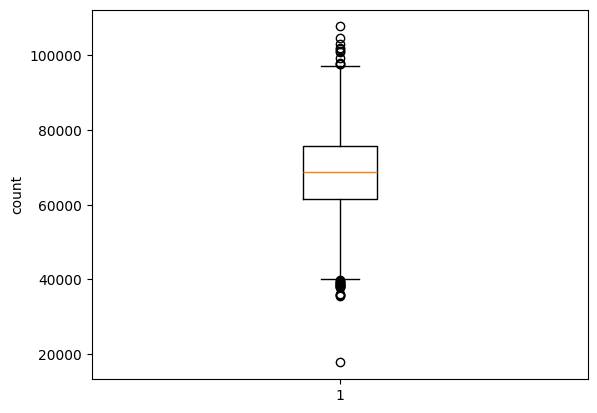

Avg. Area House Age


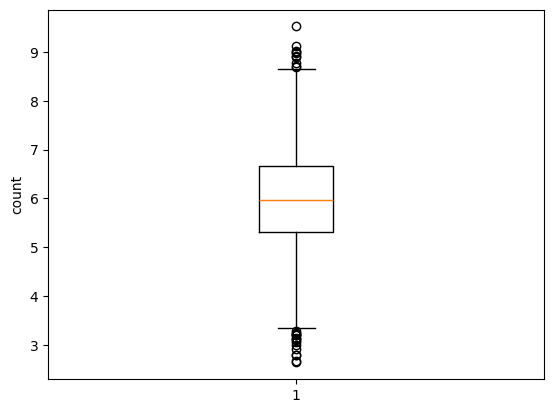

Avg. Area Number of Rooms


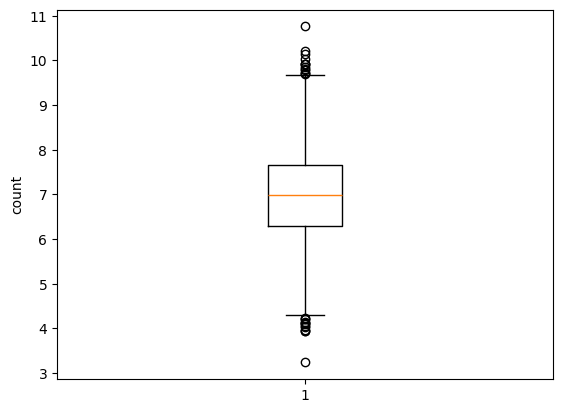

Avg. Area Number of Bedrooms


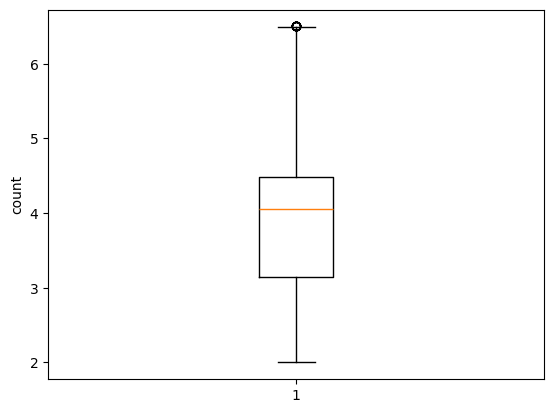

Area Population


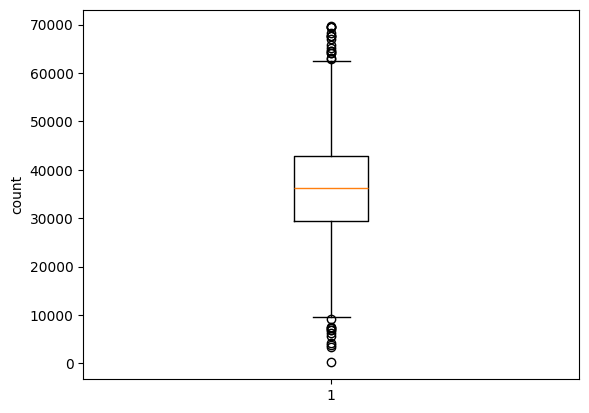

Price


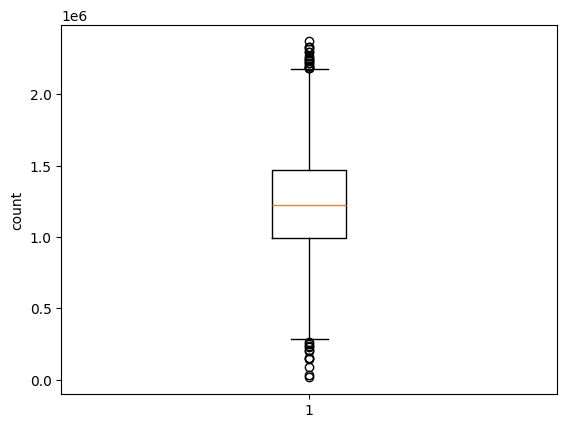

In [203]:
for i in df.select_dtypes(include='float64').columns:
  plt.boxplot(df[i])
  print(i)
  plt.ylabel("count")
  plt.show()

<Axes: >

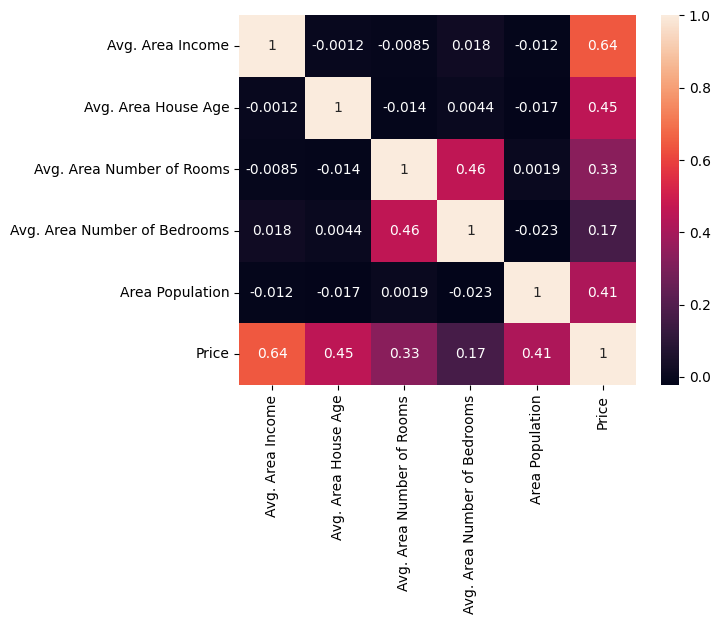

In [204]:
df_hous=df.select_dtypes(include="float64")
sns.heatmap(df_hous.corr(),annot=True)

In [205]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,City,State,Zip_Code
0,"79,545.46",5.68,7.01,4.09,"23,086.80","1,059,033.56","208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",Laurabury,NE,37010
1,"79,248.64",6.00,6.73,3.09,"40,173.07","1,505,890.91","188 Johnson Views Suite 079\nLake Kathleen, CA...",Lake Kathleen,CA,48958
2,"61,287.07",5.87,8.51,5.13,"36,882.16","1,058,987.99","9127 Elizabeth Stravenue\nDanieltown, WI 06482...",Danieltown,WI,06482
5,"80,175.75",4.99,6.10,4.04,"26,748.43","1,068,138.07","06039 Jennifer Islands Apt. 443\nTracyport, KS...",Tracyport,KS,16077
6,"64,698.46",6.03,8.15,3.41,"60,828.25","1,502,055.82","4759 Daniel Shoals Suite 442\nNguyenburgh, CO ...",Nguyenburgh,CO,20247


In [206]:
y=df.iloc[:,-1]
y

,Zip_Code
0,37010
1,48958
2,06482
5,16077
6,20247
...,...
4991,61734
4993,42719
4994,16579
4997,01707


In [207]:
outlier_list=['Avg. Area Income','Area Population','Price']
for i in outlier_list:
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  iqr=q3-q1

  df=df[(df[i]>=q1-1.5*iqr)&(df[i]<=q3+1.5*iqr)]

In [208]:
df.shape

(4403, 10)

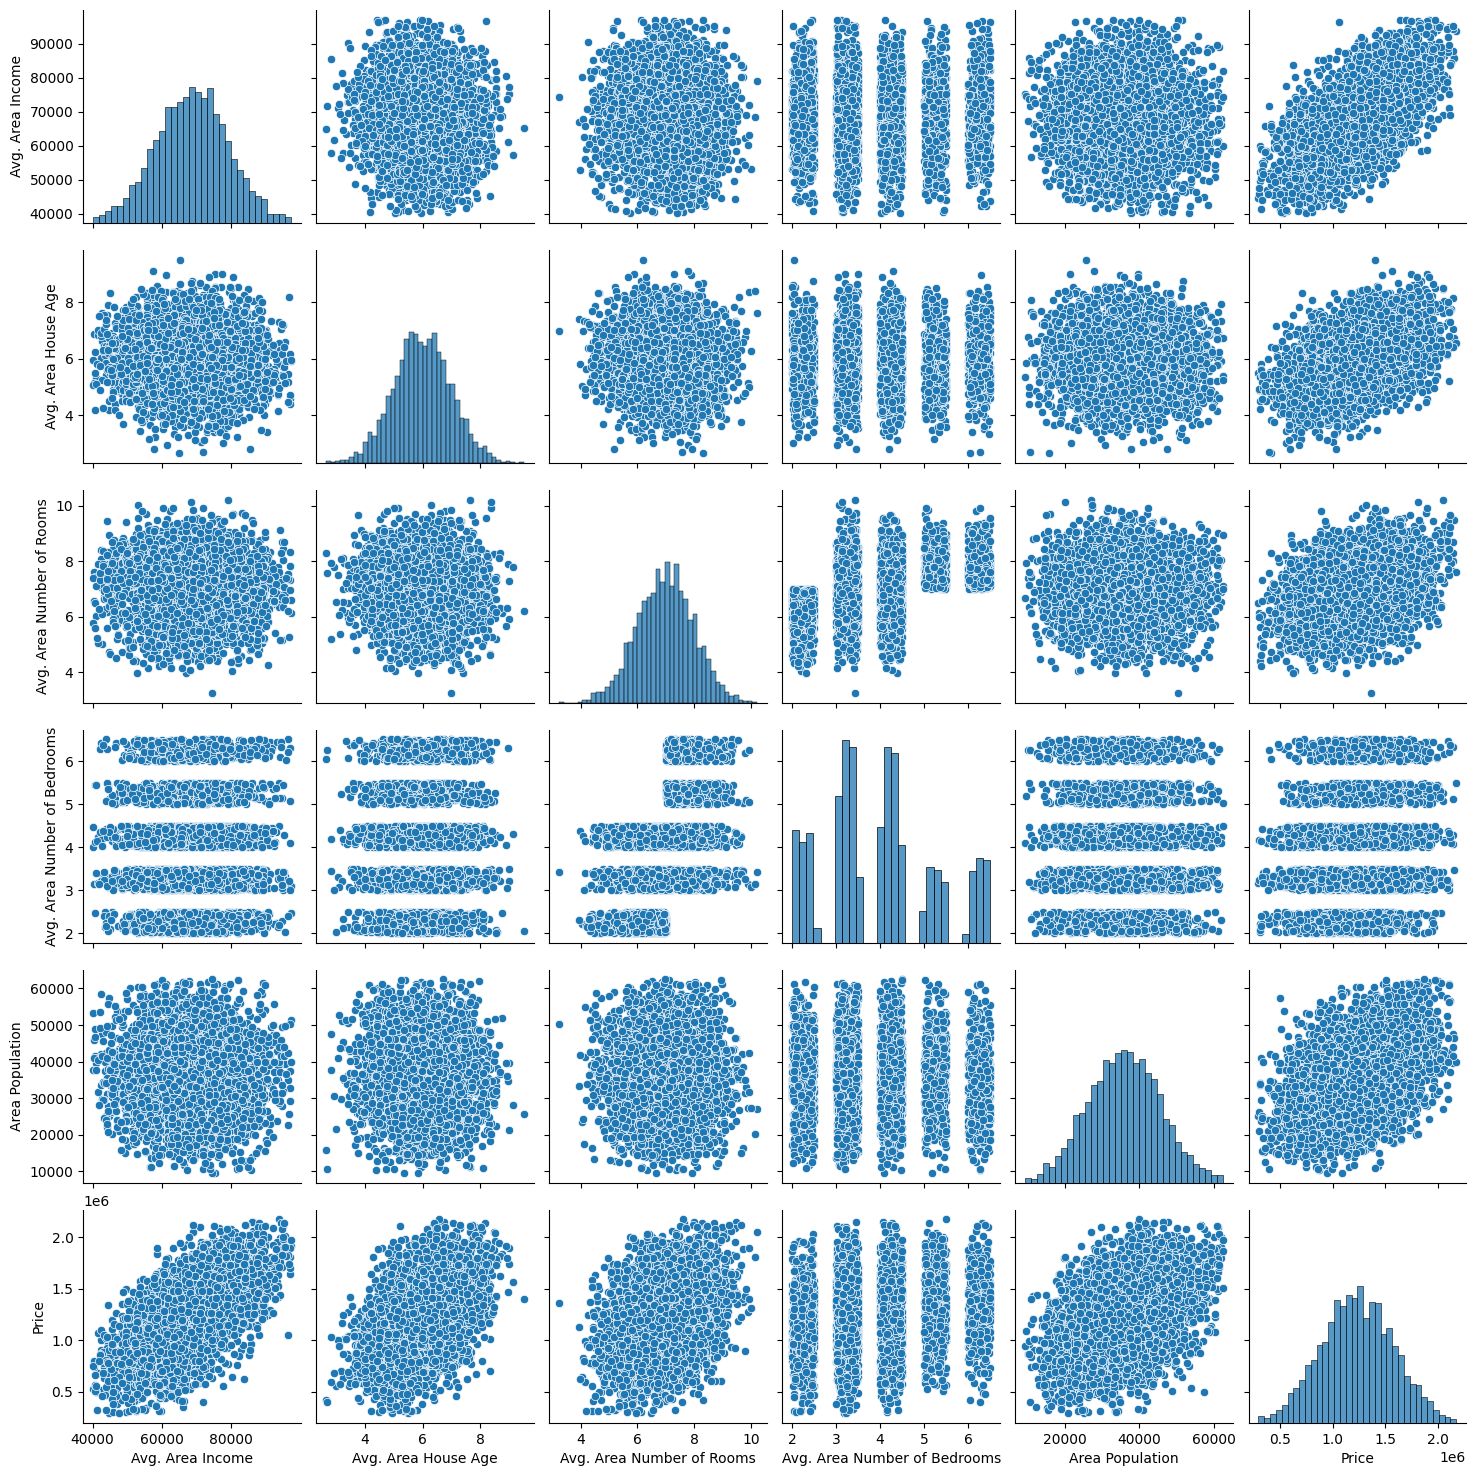

In [209]:
sns.pairplot(df)

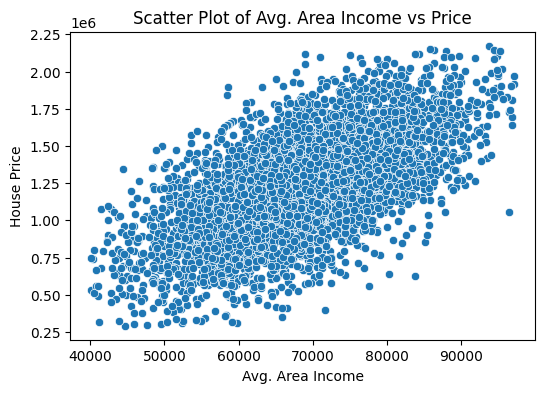

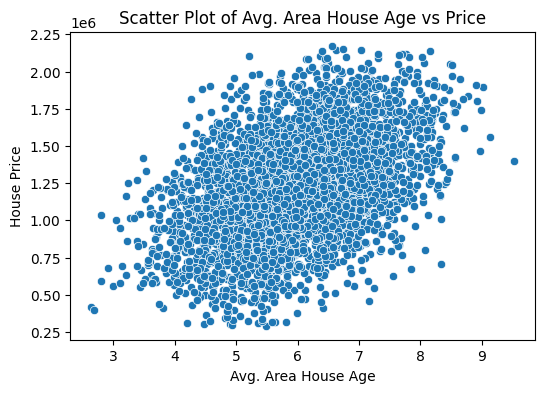

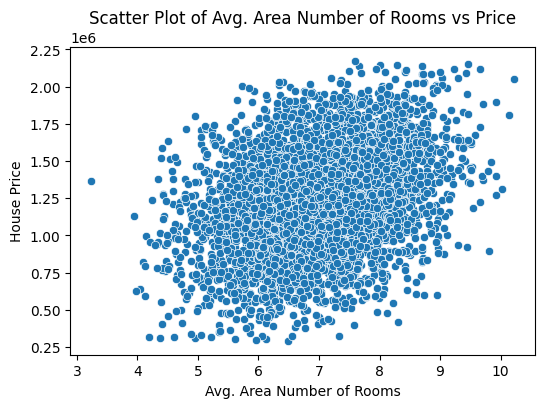

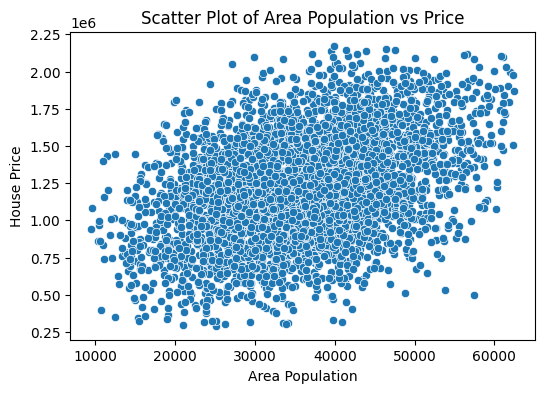

In [210]:
features = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']

# Create scatter plots
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df['Price'])
    plt.xlabel(feature)
    plt.ylabel("House Price")
    plt.title(f"Scatter Plot of {feature} vs Price")
    plt.show()

In [211]:
df.duplicated().sum()

0

In [212]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var_inflation=[]
for i in df.columns:
  if((df[i].dtype!='object')&(i!='charges')):
    var_inflation.append(i)
x=df[var_inflation]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF
0,Avg. Area Income,39.24
1,Avg. Area House Age,29.24
2,Avg. Area Number of Rooms,45.69
3,Avg. Area Number of Bedrooms,14.49
4,Area Population,15.11
5,Price,29.41


In [239]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [240]:
x = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']]
y = df['Price']

In [241]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
2004,"70,586.60",4.78,7.31,"31,798.69"
1367,"68,277.67",5.93,5.41,"38,099.87"
55,"63,819.62",5.95,8.02,"27,825.57"
328,"58,841.14",7.75,6.92,"39,555.07"
2823,"70,072.52",5.81,8.48,"43,181.82"
...,...,...,...,...
3912,"78,199.46",5.10,6.16,"50,241.04"
526,"66,112.54",8.24,7.01,"20,795.15"
3517,"64,076.91",6.30,6.81,"48,697.73"
4274,"70,632.61",7.29,7.16,"45,919.26"


In [242]:
x_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
311,"76,210.00",7.01,5.46,"22,721.65"
3897,"65,674.60",6.58,7.12,"34,492.79"
4555,"83,539.27",4.53,7.10,"37,676.56"
1148,"61,581.05",4.99,6.53,"43,070.52"
1804,"87,596.17",7.24,5.23,"35,392.05"
...,...,...,...,...
1154,"61,795.48",7.06,6.91,"40,719.13"
3729,"71,393.10",4.54,7.52,"42,077.48"
591,"70,902.30",5.61,6.42,"36,768.63"
1343,"91,832.99",6.13,7.60,"31,105.11"


In [243]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [244]:
x

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,"79,545.46",5.68,7.01,"23,086.80"
1,"79,248.64",6.00,6.73,"40,173.07"
2,"61,287.07",5.87,8.51,"36,882.16"
5,"80,175.75",4.99,6.10,"26,748.43"
6,"64,698.46",6.03,8.15,"60,828.25"
...,...,...,...,...
4991,"74,102.19",5.66,7.68,"24,041.27"
4993,"69,639.14",5.01,7.78,"54,056.13"
4994,"73,060.85",5.29,6.31,"22,695.70"
4997,"63,390.69",7.25,4.81,"33,266.15"


In [245]:
y=df.iloc[:,-1]
y

,Zip_Code
0,37010
1,48958
2,06482
5,16077
6,20247
...,...
4991,61734
4993,42719
4994,16579
4997,01707


In [246]:
y_pred2 = model.predict(x_train)
y_pred2

array([1047688.17586502, 1056532.11826882, 1121769.28387482, ...,
       1357790.19260153, 1662402.65051199,  726325.82517641])

In [247]:
y_pred = model.predict(x_test)
y_pred


array([1178667.24866466, 1259524.78191774, 1349829.59814931,
        967061.54713347, 1625781.48948908, 1736199.34501146,
       1313202.13108769, 1748087.78964764, 1403126.18463581,
        800695.77585639, 1390048.90454421, 1060137.05355622,
       1055384.34016311, 1749217.80097269, 1186195.98798707,
        866445.71750029, 1530623.3369366 , 1726031.85536066,
       1326174.30778883, 1287444.59785166, 1614094.59897605,
       1254419.82496864, 1095514.33401144,  644376.61445065,
        900217.61677795, 1316988.01467058, 1118128.97300019,
       1306654.78360884,  869220.91550064, 1466518.81362399,
        998187.61776122,  507993.47989479, 1266463.80747226,
       1031536.87463854, 1424013.28277437, 1300026.51598391,
       1301094.38859101, 1225888.92970049,  627489.84982534,
       1297432.98433838, 1129376.72356374,  845672.37801167,
       1143223.56410124, 1337012.6459368 , 1384706.13551311,
        572150.81364918, 1133600.26636758, 1095548.12628652,
       1144495.80527116,

In [248]:
r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred2)

In [249]:
print(f"R² Score: {r2_test:.4f}")
print(f"R² Score: {r2_train:.4f}")

R² Score: 0.8980
R² Score: 0.9168


In [250]:
a = model.predict([[42043,5.00,8.70,45000]])
a

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([837710.56394854])

In [251]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",mse)

Mean Squared Error:  10759312455.717928


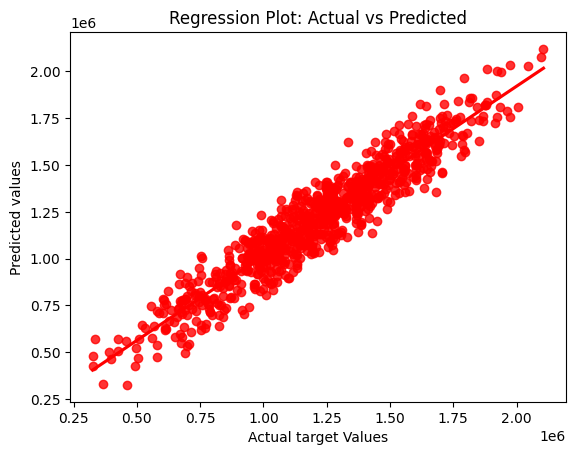

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

plt.xlabel("Actual target Values")
plt.ylabel("Predicted values")
plt.title("Regression Plot: Actual vs Predicted")
plt.show()
